# Drawing for vector fields

For vector fields, there are special drawings. Here we explain how to extract information from these drawings

In [1]:
from diffractio import np, plt
from diffractio import um, mm
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.vector_sources_XY import Vector_source_XY

In [2]:
length = 500 * um
num_data = 256
wavelength = 0.6328 * um

x0 = np.linspace(-200 * um, 200 * um, 512)
y0 = np.linspace(-200 * um, 200 * um, 512)

u0 = Scalar_source_XY(x0, y0, wavelength)
u0.gauss_beam(A=1, r0=(0 * um, 0 * um), w0=100 * um, z0=0)

EM = Vector_source_XY(x0, y0, wavelength)
EM.azimuthal_wave(u=u0, r0=(0 * um, 0 * um), radius=(200, 200))
EM.VRS(z=10 * mm, new_field=False)
EM.normalize()

Exm, Eym, _ = EM.get("E")

Ex = Scalar_source_XY(x0, y0, wavelength)
Ex.u = Exm
Ey = Scalar_source_XY(x0, y0, wavelength)
Ey.u = Eym
Ez = Scalar_source_XY(x0, y0, wavelength)

EM.reduce_matrix = ""

**Draw intensity**

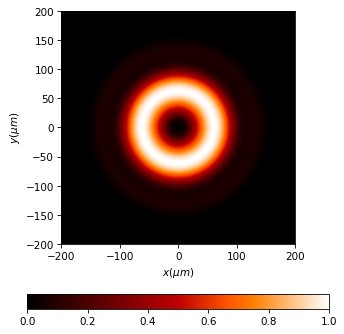

In [3]:
EM.draw(kind="intensity")

**Draw intensities**

If the Ez field presents intensity, it is also shown

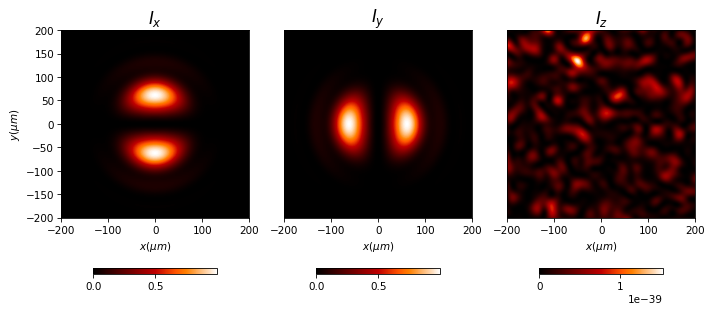

In [4]:
EM.draw(kind="intensities")

**Draw phase**

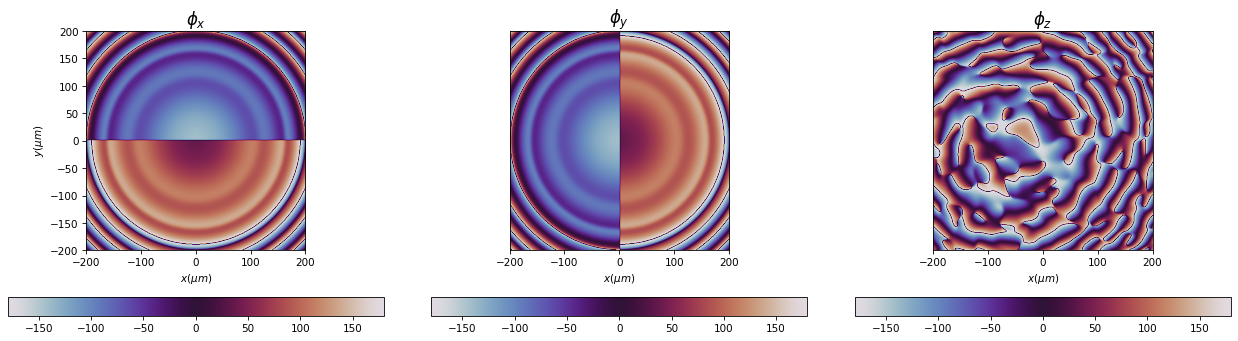

In [5]:
EM.draw(kind="phases")

**Draw field**

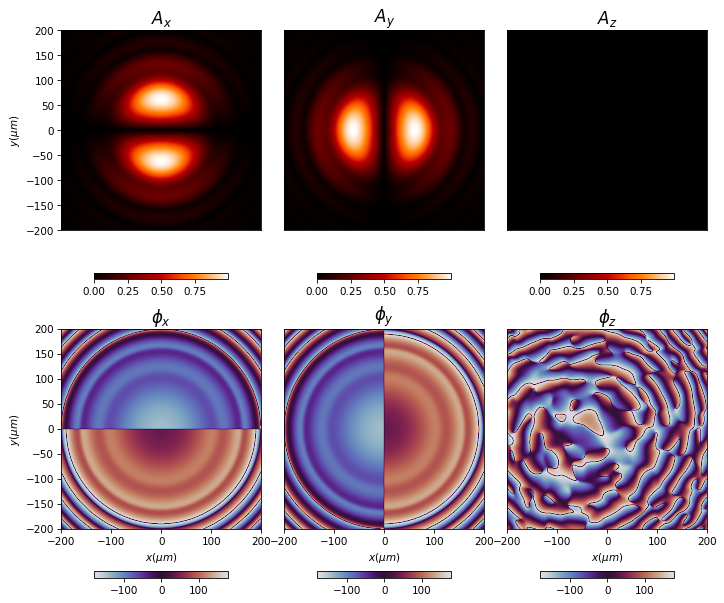

In [6]:
EM.draw(kind="fields")

**Draw Stokes**

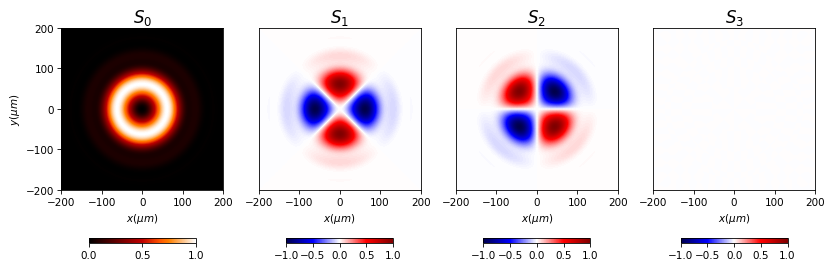

In [7]:
EM.draw(kind="stokes")

**Draw polarization ellipses parameters**

In [11]:
EM.draw(" param_ellipse")

not good kind parameter in vector_fields_XY.draw()


**Draw intensity with polarization vectors**

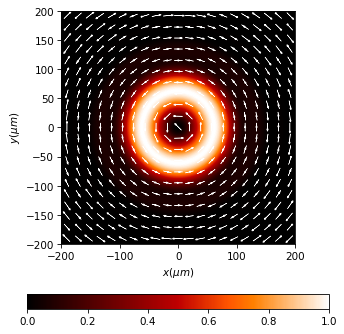

In [12]:
EM.draw(
    'ellipses',
    logarithm=False,
    normalize=False,
    cut_value=False,
    num_ellipses=(21, 21),
    amplification=0.75,
    color_line="w",
    line_width=0.5,
    draw_arrow=True,
    head_width=2,
    ax=False,
)

This polarization ellipses can also be drawn at any other drawing, provided that we have the axis associated to this drawing

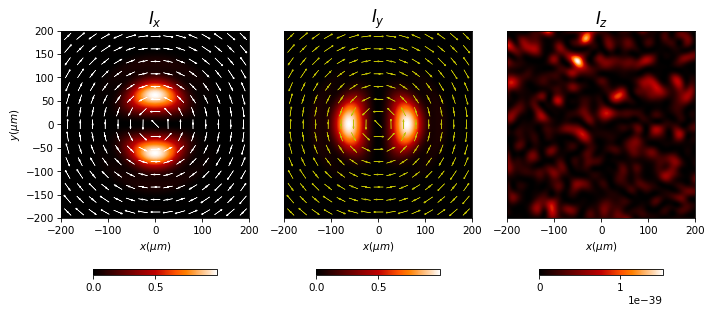

In [13]:
h1, h2,_ = EM.draw(kind='intensities')
EM.__draw_ellipses__(logarithm=False,
                     normalize=False,
                     cut_value=False,
                     num_ellipses=(15, 15),
                     amplification=0.75,
                     color_line='w',
                     line_width=.5,
                     draw_arrow=True,
                     head_width=2,
                     ax=h1)

EM.__draw_ellipses__(logarithm=False,
                     normalize=False,
                     cut_value=False,
                     num_ellipses=(15, 15),
                     amplification=0.75,
                     color_line='y',
                     line_width=.5,
                     draw_arrow=True,
                     head_width=2,
                     ax=h2)
plt.tight_layout()